<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Aula_arvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas padrão 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# código para permitir acesso ao meu google drive, assim poderei importar os dados, sem precisar fazer upload
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
caminho = '/content/gdrive/MyDrive/Colab_Notebooks/FLAI/Rafinha dos dados/Classificação/Dados/dt.csv'
data = pd.read_csv(caminho)
data

,Age,NumOfProducts,IsActiveMember,Exited
0,42,1,1,1
1,41,1,1,0
2,42,3,0,1
3,39,2,0,0
4,43,1,1,0
...,...,...,...,...
9995,39,2,0,0
9996,35,1,1,0
9997,36,1,1,1
9998,42,2,0,1


In [4]:
# Definindo variaveis preditivas e variavel resposta 
X = data.drop('Exited', axis = 1)
y = data['Exited']

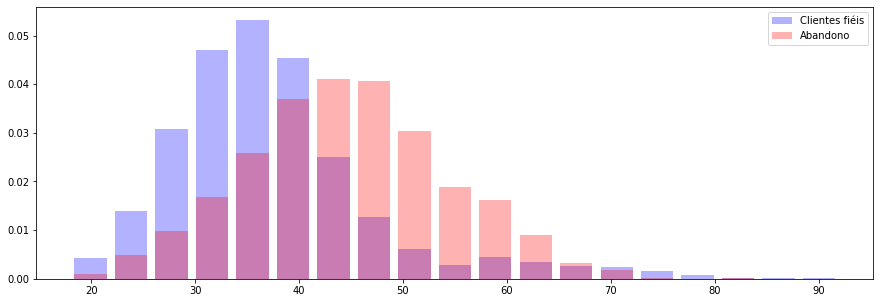

In [7]:
#Análises preliminares 
mi = X.Age.min()
ma = X.Age.max()

bins = np.linspace(mi,ma,20)


plt.figure(figsize=(15,5))
plt.hist(X.loc[y==0].Age, rwidth= 0.8 ,bins = bins,color = 'b', alpha = 0.3, density = True, label = 'Clientes fiéis')
plt.hist(X.loc[y==1].Age,rwidth= 0.8 , bins = bins,color = 'r', alpha = 0.3, density = True, label = 'Abandono')
plt.legend();

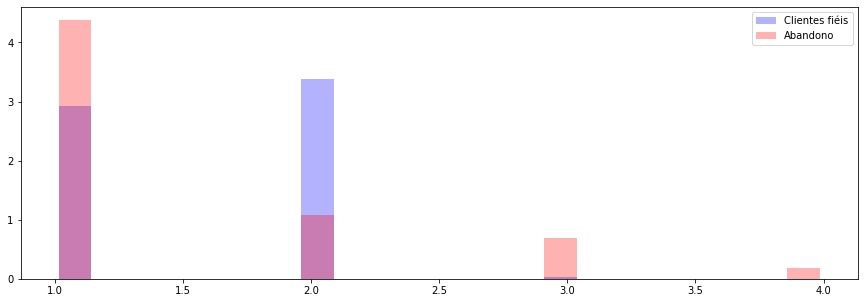

In [8]:
mi = X.NumOfProducts.min()
ma = X.NumOfProducts.max()

bins = np.linspace(mi,ma,20)


plt.figure(figsize=(15,5))
plt.hist(X.loc[y==0].NumOfProducts, rwidth= 0.8 ,bins = bins,color = 'b', alpha = 0.3, density = True, label = 'Clientes fiéis')
plt.hist(X.loc[y==1].NumOfProducts,rwidth= 0.8 , bins = bins,color = 'r', alpha = 0.3, density = True, label = 'Abandono')
plt.legend();

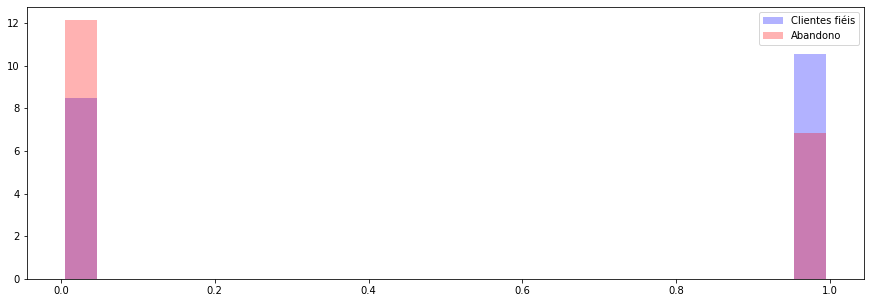

In [9]:
mi = X.IsActiveMember.min()
ma = X.IsActiveMember.max()

bins = np.linspace(mi,ma,20)


plt.figure(figsize=(15,5))
plt.hist(X.loc[y==0].IsActiveMember, rwidth= 0.8 ,bins = bins,color = 'b', alpha = 0.3, density = True, label = 'Clientes fiéis')
plt.hist(X.loc[y==1].IsActiveMember,rwidth= 0.8 , bins = bins,color = 'r', alpha = 0.3, density = True, label = 'Abandono')
plt.legend();

# DIvisão em conjunto treino e conjunto teste

# esses dados não tem uma colunad de tempo
# Então faremos uma validação out-of-sample

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Definição dos Parâmetros de VALIDAÇÃO CRUZADA

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_leaf_nodes': [4,8,16,32,64,128,256,512,1024,2048],
    'criterion' : ['gini','entropy']
}

#objeto de gridsearch

grid = GridSearchCV(
    DecisionTreeClassifier(random_state = 42), #Primeiro argumento: Modelo
    parametros,                                # SEgundo argumento; Parâmetros
    cv = 10,                                   # Argumento CV: quantidade de Folds
    scoring = 'roc_auc',                       # Argumento scoring: Métrica (Métrica mais utilizada)
    verbose = 5,                               # Argumento "Verbose": mostra na tela
)

#Encontrar o melhor modelo nos dados de TREINO por validação cruzada 

In [18]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.745 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=4;, score=0.681 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=4;, score=0.716 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=4;, score=0.734 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=4;, score=0.746 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=4;, score=0.764 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=4;, score=0.728 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=4;, score=0.743 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=4;, score=0.706 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=4;, score=0.717 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=8;, score=0.805 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

# Qual foi o melhor Parâmetro/modelo

In [20]:
grid.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 32}

#Qual foi o melhor score médio?

In [21]:
grid.best_score_

0.8335928580825248

#Vamos usar o modelo no conjunto de TESTE para ver se está bom

In [23]:
y_pred = grid.predict_proba(X_test)[:,1]
y_pred

array([0.03182375, 0.07411168, 0.07411168, ..., 0.0688172 , 0.03182375,
       0.1652452 ])

#Curva ROC

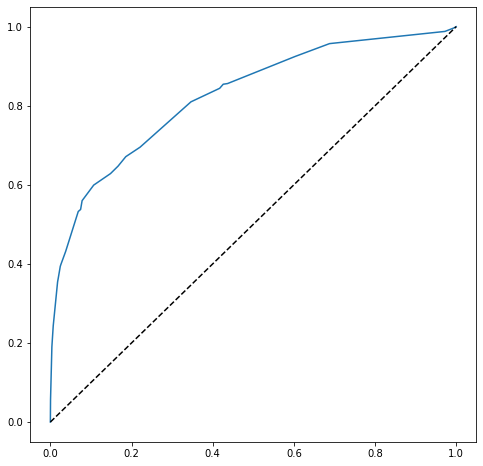

In [25]:
from sklearn.metrics import roc_curve

fpr , tpr, ths = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.plot((0,1), (0,1), 'k--'); #LINHA  PONTILHADA

# ROC/AUC  score

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred)

0.8244579515558379

# E se tivesse feito no treino?

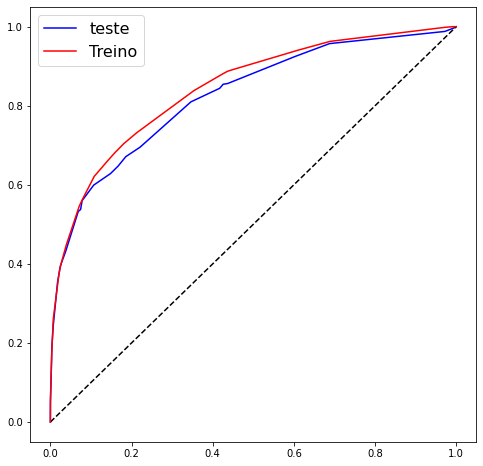

In [32]:
from sklearn.metrics import roc_curve

fpr , tpr, ths = roc_curve(y_test, y_pred,)

plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label = 'teste', color = 'b')
plt.plot((0,1), (0,1), 'k--'); #LINHA  PONTILHADA

fpr2 , tpr2, ths2 = roc_curve(y_train, grid.predict_proba(X_train)[:,1])
plt.plot(fpr2,tpr2, label = 'Treino', color = 'r')

plt.legend(fontsize = 16);

#Visualização da árvore

In [33]:
grid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

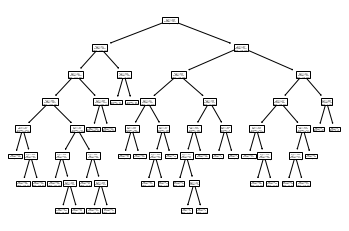

In [34]:
from sklearn.tree import plot_tree

plot_tree(grid.best_estimator_);

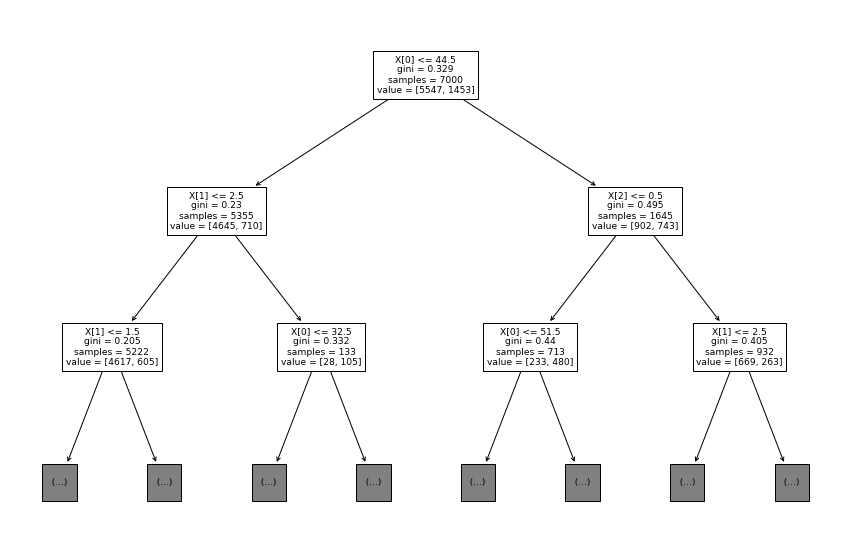

In [36]:
plt.figure(figsize=(15,10))
plot_tree(grid.best_estimator_, max_depth=2);

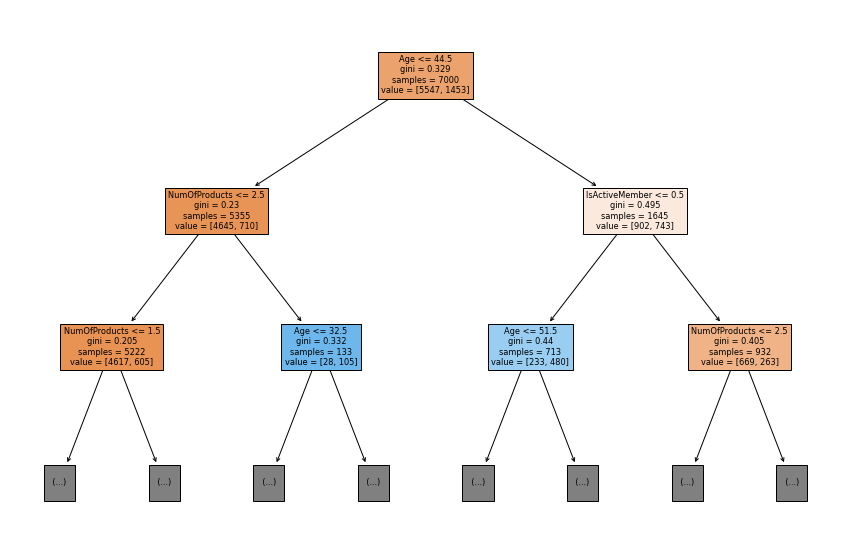

In [37]:
plt.figure(figsize=(15,10))
plot_tree(grid.best_estimator_, max_depth=2,
          feature_names = X_test.columns, filled = True,
          );